# Import All the required libraries

In [77]:
import pandas as pd 
import numpy as np
import sklearn
from scipy.stats import shapiro
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from jupyterthemes import jtplot
jtplot.style(ticks=True, grid=False)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
from sklearn.linear_model import LogisticRegressionCV

# Read Training data

In [2]:
df_train= pd.read_csv('C:/Users/ps23962/Desktop/Data Science Project/train_s3TEQDk.csv')

# Data Analysis for training data

In [3]:
df_train.count()

ID                     245725
Gender                 245725
Age                    245725
Region_Code            245725
Occupation             245725
Channel_Code           245725
Vintage                245725
Credit_Product         216400
Avg_Account_Balance    245725
Is_Active              245725
Is_Lead                245725
dtype: int64

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [5]:
df_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [6]:
#Assumption - We have data for less than 18 years of age customers
#check if we have data for less than 18 years of age customers - which shouldn't be the case 
df_assumption1=df_train[df_train['Age']>18]
df_assumption1.count()

ID                     245725
Gender                 245725
Age                    245725
Region_Code            245725
Occupation             245725
Channel_Code           245725
Vintage                245725
Credit_Product         216400
Avg_Account_Balance    245725
Is_Active              245725
Is_Lead                245725
dtype: int64

In [7]:
df_train.loc[(df_train['Age']>70) & (df_train['Is_Lead']==1) & (df_train['Is_Active'].str.contains('Yes'))]
# Records for this category is pretty less and would have less impact on the prediction

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
56,MYQVVJNR,Female,76,RG283,Other,X3,93,NaN,1061778,Yes,1
79,UYQ6AHQP,Female,73,RG284,Other,X3,81,NaN,740969,Yes,1
109,H8SSUOLH,Male,78,RG283,Other,X2,92,NaN,1808346,Yes,1
286,Q9GRWVER,Female,71,RG268,Other,X3,73,No,1940467,Yes,1
459,NGO2QWP5,Male,85,RG284,Other,X3,122,NaN,1075662,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
244129,A7F9PZF5,Male,85,RG254,Other,X3,109,Yes,3427817,Yes,1
244786,KPI3FKHE,Male,76,RG283,Other,X3,87,Yes,483065,Yes,1
244974,TGC8NRUV,Male,81,RG254,Other,X1,49,No,1384590,Yes,1
245419,IYMMA4YN,Female,76,RG282,Other,X3,92,NaN,1441515,Yes,1


In [8]:
raw_data = df_train.drop('Is_Lead', axis=1)

In [9]:
label_encoder = LabelEncoder()
raw_data.iloc[:,0] = label_encoder.fit_transform(raw_data.iloc[:,0]).astype('float64')

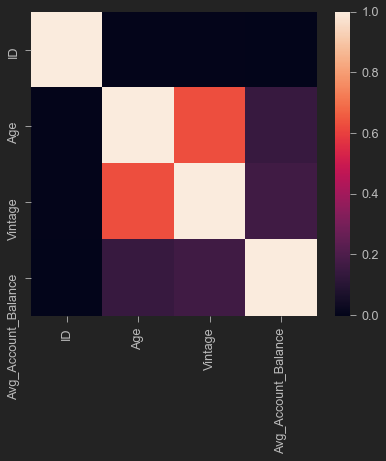

In [10]:
import seaborn as sns
corr = raw_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Preprocessing

In [11]:
# drop nulls
#df_train = df_train.dropna(axis=0)
#df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216400 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   216400 non-null  object
 1   Gender               216400 non-null  object
 2   Age                  216400 non-null  int64 
 3   Region_Code          216400 non-null  object
 4   Occupation           216400 non-null  object
 5   Channel_Code         216400 non-null  object
 6   Vintage              216400 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  216400 non-null  int64 
 9   Is_Active            216400 non-null  object
 10  Is_Lead              216400 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 19.8+ MB


In [6]:
#create category of null values in credit product a default
df_train['Credit_Product']=df_train['Credit_Product'].replace(np.nan,'No_Info')

In [7]:
df_train['Credit_Product'].unique()

array(['No', 'No_Info', 'Yes'], dtype=object)

In [8]:
# Remove characters from the region and convert it to int for data model training
df_train['Region_Code']=df_train['Region_Code'].str[2:]
#df_train['Region_Code'].astype(int)
df_train['Region_Code']=df_train['Region_Code'].apply(pd.to_numeric)
df_train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,284,Self_Employed,X3,109,No_Info,1925586,No,0
245721,HFNB7JY8,Male,27,268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,273,Salaried,X1,31,No,407504,No,0


In [13]:
#convert channel_code to integer type by using one hot encoding technique or creating dummies for the column
df_train['Channel_Code'].unique()

array(['X3', 'X1', 'X2', 'X4'], dtype=object)

In [14]:
df_train['Occupation'].unique()

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

In [15]:
df_train['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
df_train['Is_Active'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df_train['Credit_Product'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df_train=pd.get_dummies(df_train,columns=['Channel_Code','Is_Active','Occupation','Gender','Credit_Product'])

In [10]:
#drop  duplicates and  Column name ID
df_train=df_train.drop_duplicates()
df_train.drop('ID', axis=1, inplace=True)

In [11]:
df_train.columns

Index(['Age', 'Region_Code', 'Vintage', 'Avg_Account_Balance', 'Is_Lead',
       'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Is_Active_No', 'Is_Active_Yes',
       'Occupation_Entrepreneur', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Gender_Female', 'Gender_Male',
       'Credit_Product_No', 'Credit_Product_No_Info', 'Credit_Product_Yes'],
      dtype='object')

In [12]:
df_train.columns

Index(['Age', 'Region_Code', 'Vintage', 'Avg_Account_Balance', 'Is_Lead',
       'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X4', 'Is_Active_No', 'Is_Active_Yes',
       'Occupation_Entrepreneur', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Gender_Female', 'Gender_Male',
       'Credit_Product_No', 'Credit_Product_No_Info', 'Credit_Product_Yes'],
      dtype='object')

In [13]:
#Create target label (y) and features (x)
y = df_train['Is_Lead'] # Labels
df_train.drop('Is_Lead', axis=1, inplace=True)# Features
x=df_train
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
X_train.shape

(172007, 19)

In [15]:
X_test.shape

(73718, 19)

In [16]:
y_train.shape

(172007,)

In [17]:
y_test.shape

(73718,)

# Model Training 

## Logistic RegressionCV

In [74]:
logistic = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

In [75]:
y_pred=logistic.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7623646870506525


## Random Forest

In [18]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [19]:
from sklearn import metrics
y_pred=model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8507827124989826


In [20]:
# Actual class predictions
rf_predictions = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

### Model Tuning

In [69]:
model_params = {
    'bootstrap': [True, False],
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': [100, 200, 300, 400, 500, 600,700],
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': ['auto', 'sqrt'],
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': [2, 5, 10]
}

In [70]:
# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator

tune_rf = RandomizedSearchCV(rf_model, model_params, n_iter=3, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model_rf_tune = tune_rf.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model_rf_tune.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [71]:
from sklearn import metrics
y_pred_rf_tune=model_rf_tune.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8569277517024336


##  Gradient Boosting

In [47]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, y_train)

In [56]:
from sklearn import metrics
y_pred=clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8569277517024336


# Predictions from test data

## Preprocess Test Data

In [32]:
# Read Test Data
df_test =  pd.read_csv('C:/Users/ps23962/Desktop/Data Science Project/test_mSzZ8RL.csv')


In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [34]:
#extract ID's for final Result set merge 
Identifier= df_test['ID']

In [35]:
columns_1 = ["ID"]
data_1 = Identifier
df_Identifier = pd.DataFrame(data=data_1, columns=columns_1)

In [36]:
# Remove characters from the region and convert it to int for data model training
df_test['Region_Code']=df_test['Region_Code'].str[2:]
#df_train['Region_Code'].astype(int)
df_test['Region_Code']=df_test['Region_Code'].apply(pd.to_numeric)

In [37]:
#create category of null values in credit product a default
df_test['Credit_Product']=df_test['Credit_Product'].replace(np.nan,'No_Info')

In [38]:
df_test=pd.get_dummies(df_test,columns=['Channel_Code','Is_Active','Occupation','Gender','Credit_Product'])

In [39]:
#drop  duplicates and  Column name ID
df_test=df_test.drop_duplicates()
df_test.drop('ID', axis=1, inplace=True)

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105312 entries, 0 to 105311
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Age                       105312 non-null  int64
 1   Region_Code               105312 non-null  int64
 2   Vintage                   105312 non-null  int64
 3   Avg_Account_Balance       105312 non-null  int64
 4   Channel_Code_X1           105312 non-null  uint8
 5   Channel_Code_X2           105312 non-null  uint8
 6   Channel_Code_X3           105312 non-null  uint8
 7   Channel_Code_X4           105312 non-null  uint8
 8   Is_Active_No              105312 non-null  uint8
 9   Is_Active_Yes             105312 non-null  uint8
 10  Occupation_Entrepreneur   105312 non-null  uint8
 11  Occupation_Other          105312 non-null  uint8
 12  Occupation_Salaried       105312 non-null  uint8
 13  Occupation_Self_Employed  105312 non-null  uint8
 14  Gender_Female       

## Predictions from Random Forest

In [41]:
#Predicted results
results=model.predict(df_test)

In [42]:
# created results dataframe to merge with Identifier dataframe for final result
columns = ["Is_Lead"]
data = results
Results = pd.DataFrame(data=data, columns=columns)

In [52]:
final_Random_forest = pd.concat([df_Identifier,Results], axis=1)
final_Random_forest.to_csv('final_Random_forest.csv',index=False)

In [ ]:
#Prediction from tuned model
#Predicted results
results_1=model_rf_tune.predict(df_test)
columns_1 = ["Is_Lead"]
data_3 = results_3
Results_3 = pd.DataFrame(data=data_3, columns=columns_1)
Tune_Random_forest = pd.concat([df_Identifier,Results_3], axis=1)
Tune_Random_forest.to_csv('Tune_Random_forest.csv',index=False)

## Predictions from Logistic Regression

In [ ]:
results_logistic=logistic.predict(df_test)
# created results dataframe to merge with Identifier dataframe for final result
columns_4 = ["Is_Lead"]
data_4 = results_logistic
results_logistic = pd.DataFrame(data=data_4, columns=columns_4)
logistic_results = pd.concat([df_Identifier,Results_3], axis=1)
logistic_results.to_csv('logistic_results.csv',index=False)

## Using gradient boost classifier

In [57]:
#Predicted results
results_xgb=clf.predict(df_test)

In [58]:
# created results dataframe to merge with Identifier dataframe for final result
columns_5 = ["Is_Lead"]
data_5 = results_xgb
Results_xgb = pd.DataFrame(data=data_5, columns=columns_5)

In [60]:
final_XGB = pd.concat([df_Identifier,Results_xgb], axis=1)
final_XGB.to_csv('final_XGB.csv',index=False)